# Testing for Normality

## Importing the Libraries

In [116]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Creating Data

In [117]:
sample_normal = np.random.randint(2, 10) * np.random.normal(size=1000) + np.random.randint(20, 90)
sample_poisson = np.random.randint(2, 10) * np.random.poisson(size=1000) + np.random.randint(20, 90)

In [118]:
sample_normal[:5]

array([81.98725618, 82.2009744 , 76.45635628, 82.31186991, 86.82363726])

In [119]:
sample_poisson[:5]

array([88, 84, 84, 86, 84])

## Visual Tests of Normality

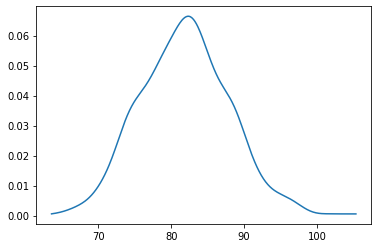

In [120]:
density = stats.kde.gaussian_kde(sample_normal)
x = np.arange(min(sample_normal), max(sample_normal), 0.1)
# x = np.linspace(min(sample_normal), max(sample_normal), 200)
plt.plot(x, density(x))
plt.show()

This plot shows that `sample_normal` is **normal like**.

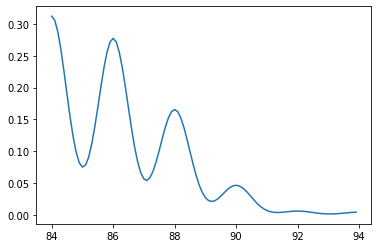

In [121]:
density = stats.kde.gaussian_kde(sample_poisson)
x = np.arange(min(sample_poisson), max(sample_poisson), 0.1)
# x = np.linspace(min(sample_normal), max(sample_normal), 200)
plt.plot(x, density(x))
plt.show()

This plot definitively shows that `sample_poisson` is **non-normal**.

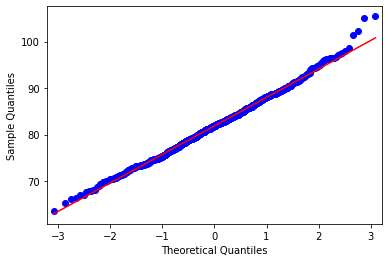

In [122]:
qqplot(sample_normal, line='s')
plt.show()

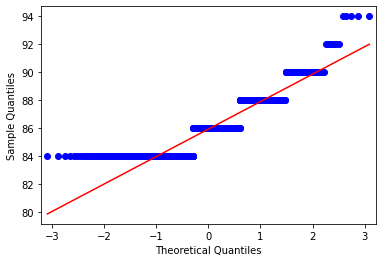

In [123]:
qqplot(sample_poisson, line='s')
plt.show()

## Tests for Normality

  - Shapiro-Wilk Test - `scipy.stats.shapiro()`
  - D’Agostino’s K$^{2}$ Test - `scipy.stats.normaltest()`
  - Anderson-Darling Test - `scipy.stats.anderson()`

The $p$-value is interpreted as follows.
  - $p$ <= $\alpha$: reject $H_{0}$: The Data is not normal.
  - $p$ > $\alpha$: fail to reject $H_{0}$, the data is normal.


### Shapiro-Wilk

In [124]:
stat, p = stats.shapiro(sample_normal)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.022
Sample does not look Gaussian (reject H0)


In [125]:
stat, p = stats.shapiro(sample_poisson)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.832, p=0.000
Sample does not look Gaussian (reject H0)


### D’Agostino’s K$^{2}$

In [126]:
stat, p = stats.normaltest(sample_normal)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=7.768, p=0.021
Sample does not look Gaussian (reject H0)


In [127]:
stat, p = stats.normaltest(sample_poisson)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=118.647, p=0.000
Sample does not look Gaussian (reject H0)


### Anderson-Darling

In [128]:
result = stats.anderson(sample_normal)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.507
15.000: 0.574, data looks normal (fail to reject H0)
10.000: 0.653, data looks normal (fail to reject H0)
5.000: 0.784, data looks normal (fail to reject H0)
2.500: 0.914, data looks normal (fail to reject H0)
1.000: 1.088, data looks normal (fail to reject H0)


In [129]:
result = stats.anderson(sample_poisson)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 61.625
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


In [130]:
result

AndersonResult(statistic=61.62463363192501, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [131]:
def test_normality(df):
    
    """
    Parameters
    ----------
    df: Pandas DataFrame
    
    Returns
    -------
    cols_normal: Dictionary (k, v) : (colname, normal or not (bool))
    """
    
    ncols = list(df.select_dtypes(include=[np.number]).columns)
    cols_normal = {}
    for col in ncols:
        print('-'*32)
        print('Normality Test for Column: {}'.format(col))
        tests_passed = 0
        alpha = 0.05
        
        ## Shapiro Test
        stat_shapiro, p_shapiro = stats.shapiro(df[col].values)
        print(f'Shapiro Statistic {stat_shapiro:.3f}.')
        print(f'Shapiro P-Value {p_shapiro:.3f}')
        if p_shapiro > alpha:
            tests_passed += 1
        
        ## D’Agostino’s K2 Test
        stat_k2, p_k2 = stats.normaltest(df[col].values)
        print(f'D’Agostino’s K2 Statistic {stat_k2:.3f}.')
        print(f'D’Agostino’s K2 P-Value {p_k2:.3f}')
        if p_k2 > alpha:
            tests_passed += 1
        
        if tests_passed == 2:
            cols_normal[col] = True
        else:
            cols_normal[col] = False
    print()
    return cols_normal

In [132]:
df = pd.DataFrame(columns=['x1', 'x2'])
df['x1'] = sample_normal
df['x2'] = sample_poisson
df.head()

,x1,x2
0,81.987256,88
1,82.200974,84
2,76.456356,84
3,82.311870,86
4,86.823637,84


In [133]:
test_normality(df)

--------------------------------
Normality Test for Column: x1
Shapiro Statistic 0.996.
Shapiro P-Value 0.022
D’Agostino’s K2 Statistic 7.768.
D’Agostino’s K2 P-Value 0.021
--------------------------------
Normality Test for Column: x2
Shapiro Statistic 0.832.
Shapiro P-Value 0.000
D’Agostino’s K2 Statistic 118.647.
D’Agostino’s K2 P-Value 0.000



{'x1': False, 'x2': False}

In [134]:
heart_df = pd.read_csv('C:\\Users\\neilb\\Documents\\github\\logistic-regression\\heart_disease\\heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
test_normality(heart_df.drop(columns = ['sex', 'target']))

--------------------------------
Normality Test for Column: age
Shapiro Statistic 0.986.
Shapiro P-Value 0.006
D’Agostino’s K2 Statistic 8.748.
D’Agostino’s K2 P-Value 0.013
--------------------------------
Normality Test for Column: cp
Shapiro Statistic 0.790.
Shapiro P-Value 0.000
D’Agostino’s K2 Statistic 168.439.
D’Agostino’s K2 P-Value 0.000
--------------------------------
Normality Test for Column: trestbps
Shapiro Statistic 0.966.
Shapiro P-Value 0.000
D’Agostino’s K2 Statistic 28.568.
D’Agostino’s K2 P-Value 0.000
--------------------------------
Normality Test for Column: chol
Shapiro Statistic 0.947.
Shapiro P-Value 0.000
D’Agostino’s K2 Statistic 83.504.
D’Agostino’s K2 P-Value 0.000
--------------------------------
Normality Test for Column: fbs
Shapiro Statistic 0.424.
Shapiro P-Value 0.000
D’Agostino’s K2 Statistic 111.744.
D’Agostino’s K2 P-Value 0.000
--------------------------------
Normality Test for Column: restecg
Shapiro Statistic 0.679.
Shapiro P-Value 0.000
D’Ag

{'age': False,
 'cp': False,
 'trestbps': False,
 'chol': False,
 'fbs': False,
 'restecg': False,
 'thalach': False,
 'exang': False,
 'oldpeak': False,
 'slope': False,
 'ca': False,
 'thal': False}